In [2]:
import os
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning) 
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 깨짐 방지를 위한 Font 지정
import os
if os.name =='nt' : 
    font_family = "Malgun Gothic"
else :
    font_family = "AppleGothic"

# 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

In [10]:
os.getcwd() #경로 확인

'C:\\Users\\user\\titanic'

In [9]:
os.listdir() # dir확인

['gender_submission.csv', 'test.csv', 'train.csv']

In [8]:
# 경로 설정
os.chdir('titanic')

In [11]:
os.listdir()

['gender_submission.csv', 'test.csv', 'train.csv']

In [12]:
# 데이터 리드
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [13]:
# 리스트 형태 데이터 병합
train_test_data = [train, test]

In [14]:
type(train_test_data)

list

In [15]:
type(train)

pandas.core.frame.DataFrame

In [17]:
# 데이터 카피
data = train.copy()

In [18]:
# 데이터셋 shape 확인
print(data.shape) # 891행, 속성 12개.

(891, 12)


In [19]:
# 범주형 변수 기술 통계 정보 확인
data.describe(include = object) # Object 타입 데이터만 확인. None = 수치 데이터

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [20]:
# 수치형 변수 기술 통계 정보 확인
data.describe() # 이를 통해 결측값이나 값들을 대충 예상할 수 있다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
data.info() # 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
# 연속형 변수 속성 추출
numerical_feats = data.dtypes[data.dtypes == 'int64'].index
numerical_feats = numerical_feats.append(data.dtypes[data.dtypes == 'float64'].index)
print('연속형 변수카운트 :', len(numerical_feats))

연속형 변수카운트 : 7


In [24]:
numerical_feats

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare'], dtype='object')

In [26]:
# 연속형변수의 왜도와 첨도 확인
for col in numerical_feats :
    print('{:15}'.format(col),
         'Skewness: {:05.2f}'.format(data[col].skew()),
         '   ',
         'Kurtosis : {:06.2f}'.format(data[col].kurt())
         )

PassengerId     Skewness: 00.00     Kurtosis : -01.20
Survived        Skewness: 00.48     Kurtosis : -01.78
Pclass          Skewness: -0.63     Kurtosis : -01.28
SibSp           Skewness: 03.70     Kurtosis : 017.88
Parch           Skewness: 02.75     Kurtosis : 009.78
Age             Skewness: 00.39     Kurtosis : 000.18
Fare            Skewness: 04.79     Kurtosis : 033.40


<AxesSubplot:xlabel='Fare', ylabel='Density'>

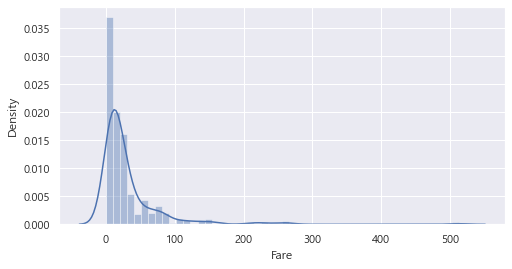

In [28]:
# 왜도가 큰 'Fare' 변수의 분포 확인
f, ax = plt.subplots(figsize = (8,4))

sns.distplot(data['Fare'])

Skewness : 0.395
Kurtosis : 0.976


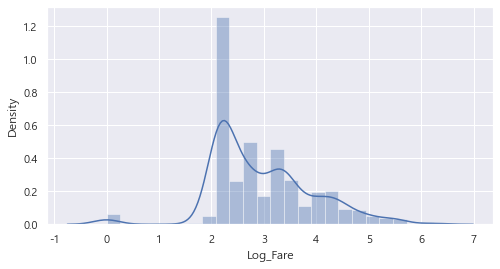

In [31]:
# 로그 변환수행
# np.log() 가 아닌 np.log1p() 사용, 변환 전의 값이 작으면 컴퓨터 계산 오류 발생
data["Log_Fare"] = np.log1p(data["Fare"]) #Fare 속성에 Log 를 씌운다.

f,ax = plt.subplots(figsize = (8,4))
sns.distplot(data["Log_Fare"])

print("Skewness : {:.3f}".format(data["Log_Fare"].skew()))
print("Kurtosis : {:.3f}".format(data["Log_Fare"].kurt()))
             

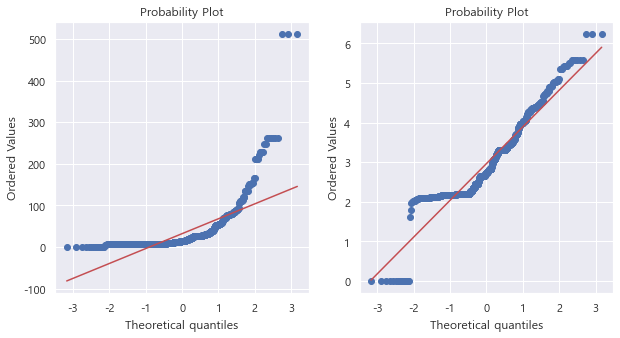

In [32]:
# QQ-Plot 으로 정규성 검정
fig = plt.figure(figsize = (10,5))

fig.add_subplot(1,2,1)
res = stats.probplot(data['Fare'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(data['Log_Fare'], plot=plt)

In [33]:
''' Min-Max 정규화 '''

# 데이터 확인
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
# MR, Miss 값이 저장된 파생변수 생성
for dataset in train_test_data :
    dataset['Title'] = dataset['Name'].str.extract('([\w]+)\.', expand=False)
    
for dataset in train_test_data:
        dataset['Title'] = dataset['Title'].apply(lambda x: 0 if x== "Mr" else 1 if
    x == "Miss" else 2 if x== "Mrs" else 3 if x=="Master" else 4)
        
# 걀측값 제거
for dataset in train_test_data :
        dataset['Age'].fillna(dataset.groupby('Title')['Age'].transform('median'),
                             inplace = True)

In [47]:
# Min-Max 정규화
scaler = MinMaxScaler()

for dataset in train_test_data:
    array = dataset['Age'].values.reshape(-1,1) # 2D array 로 변환
    scaler.fit(array)
    dataset['AgeScale'] = pd.Series(scaler.transform(array).reshape(-1))
    # 스케일링 후에 series 로 추가한다.

In [48]:
# AgeScale 변수 확인
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeScale
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,4,0.271174
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,4,0.472229
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,0.321438
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,4,0.434531
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,4,0.434531


In [52]:
# Min-Max 정규화 전 Age 변수의 min, max값
print(train['Age'].min())
print(train['Age'].max())
print('  ')
# Min-Max 정규화 후 Agescale 변수의 min, max값
print(train['AgeScale'].min())
print(train['AgeScale'].max())

0.42
80.0
  
0.0
1.0


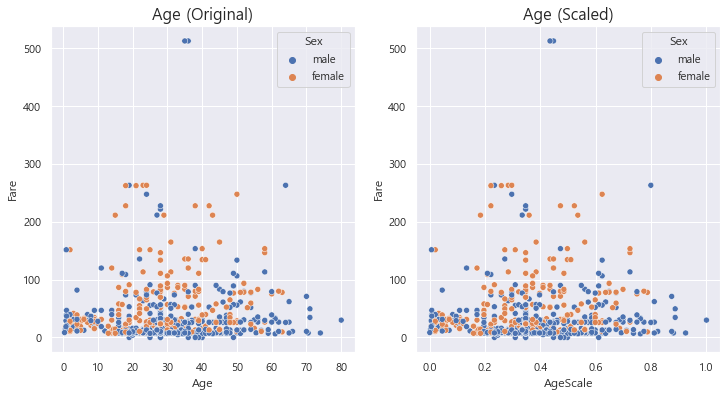

In [54]:
# Min-Max 정규화 전, 후 Age속성과 AgeScale 속성의 산점도 비교
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
scatter_plot = sns.scatterplot(x = 'Age', y='Fare', hue = 'Sex', data= train)
plt.title('Age (Original)', fontsize = 16)

plt.subplot(1, 2, 2)
scatter_plot = sns.scatterplot(x = 'AgeScale', y='Fare', hue = 'Sex', data= train)
plt.title('Age (Scaled)', fontsize = 16)
plt.show()

In [56]:
# 데이터 확인
# train_test_data[0]
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeScale
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,4,0.271174
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,4,0.472229
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,0.321438
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,4,0.434531
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,4,0.434531


In [57]:
# 결측값 중앙값으로 대체
for dataset in train_test_data :
    dataset['Fare'].fillna(dataset.groupby("Pclass")["Fare"].transform("median"),
                          inplace = True)
# 표준화 수행
scaler = StandardScaler()

for dataset in train_test_data :
    array = dataset['Fare'].values.reshape(-1, 1)
    scaler.fit(array)
    dataset['FareScale'] = pd.Series(scaler.transform(array).reshape(-1))
    

train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeScale,FareScale
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,4,0.271174,-0.502445
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,4,0.472229,0.786845
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,0.321438,-0.488854
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,4,0.434531,0.420730
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,4,0.434531,-0.486337


In [59]:
# 표준화 전 Fare 변수의 mean, var 값
print(train['Fare'].mean())
print(train['Fare'].var())
print('   ')

#표준화 후 Fare 변수의 mean, var 값
print(train['FareScale'].mean())
print(train['FareScale'].var())

32.2042079685746
2469.436845743117
   
-4.37360585458395e-17
1.0011235955056188


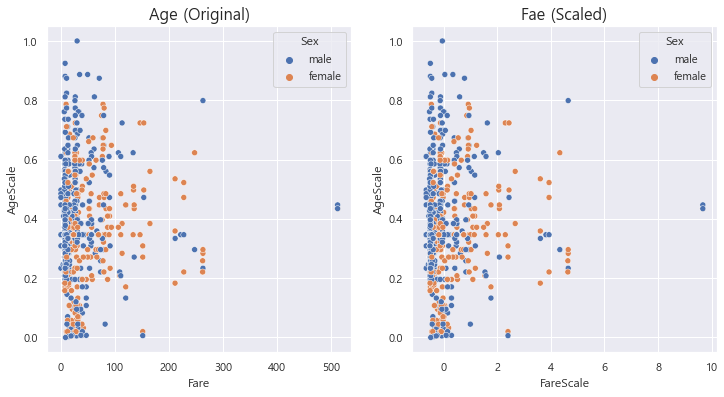

In [60]:
# 표준화 전, 후 fare 변수와 FareScale 변수의 산점도 비교
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
scatter_plot = sns.scatterplot(x = 'Fare', y='AgeScale', hue = 'Sex', data= train)
plt.title('Age (Original)', fontsize = 16)

plt.subplot(1, 2, 2)
scatter_plot = sns.scatterplot(x = 'FareScale', y='AgeScale', hue = 'Sex', data= train)
plt.title('Fae (Scaled)', fontsize = 16)
plt.show()

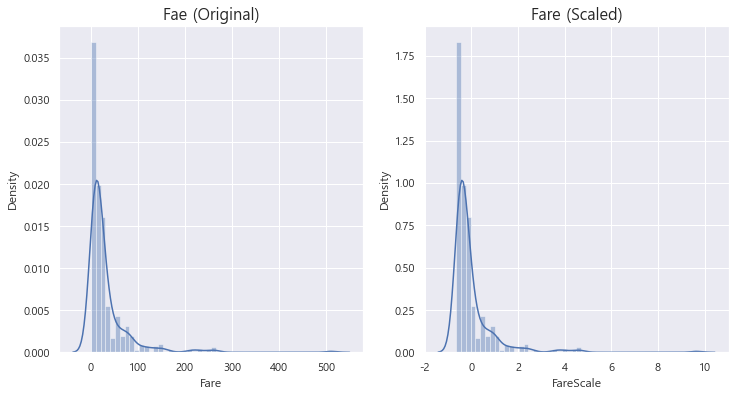

In [61]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
dis_plot = sns.distplot(train['Fare'],label = 'Fare')
plt.title('Fae (Original)', fontsize = 16)

plt.subplot(1,2 ,2)

dis_plot = sns.distplot(train["FareScale"], label = "FareScale")
plt.title('Fare (Scaled)', fontsize = 16)
plt.show()